<a href="https://colab.research.google.com/github/Komal-patra/super_duper_machine_learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.


In [1]:
!pip install pandas-profiling --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 20.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.25.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pan

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7c61dc328e80>)

In [5]:
import pandas as pd

In [6]:
medical_df = pd.read_csv('medical.csv')

In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


For Some statistics:

In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Analysis and Visualization



In [10]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [12]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [13]:
fig = px.histogram(
    medical_df,
    x = 'age',
    marginal='box',
    nbins=47,
    title='Distribution of Age'
)
fig.update_layout(bargap=0.1)
fig.show()

### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [14]:
fig = px.histogram(
    medical_df,
    x='bmi',
    marginal='box',
    color_discrete_sequence=['red'],
    title= ' Distribution of BMI'
)
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)



## Charges

In [15]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='smoker',
                  color_discrete_sequence=['green','grey'],
                  title='Yearly Medical charges'
                  )
fig.update_layout(bargap=0.1)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [16]:
import plotly.express as px

fig = px.histogram(medical_df,
                   x='charges',
                   color='sex',
                   facet_col='region',
                   facet_col_wrap=3,
                   labels={'charges': 'Medical Charges'},
                   title='Distribution of Medical Charges by Sex and Region'
                  )

fig.update_layout(bargap=0.1)
fig.show()


### Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [17]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [18]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
import plotly.express as px

fig = px.histogram(medical_df,
                   x='sex',
                   color='region',
                   facet_col='children',
                   facet_col_wrap=3,
                   category_orders={"children": ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]},
                   labels={'sex': 'Sex', 'region': 'Region', 'children': 'Number of Children'},
                   title='Distributions of Sex, Region, and Number of Children'
                  )

fig.update_layout(bargap=0.1)
fig.show()


Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [20]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [21]:
fig = px.scatter(medical_df,
                x= 'bmi',
                y='charges',
                color= 'smoker',
                opacity=0.8,
                hover_data=['sex'],
                title=' BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.


### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [22]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [23]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [24]:
sex_values = {'female':0,'male':1}
sex_numeric = medical_df.sex.map(sex_values)
medical_df.charges.corr(sex_numeric)

0.057292062202025484

In [25]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [26]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Next, let's visualize the relationship between "age" and "charges"

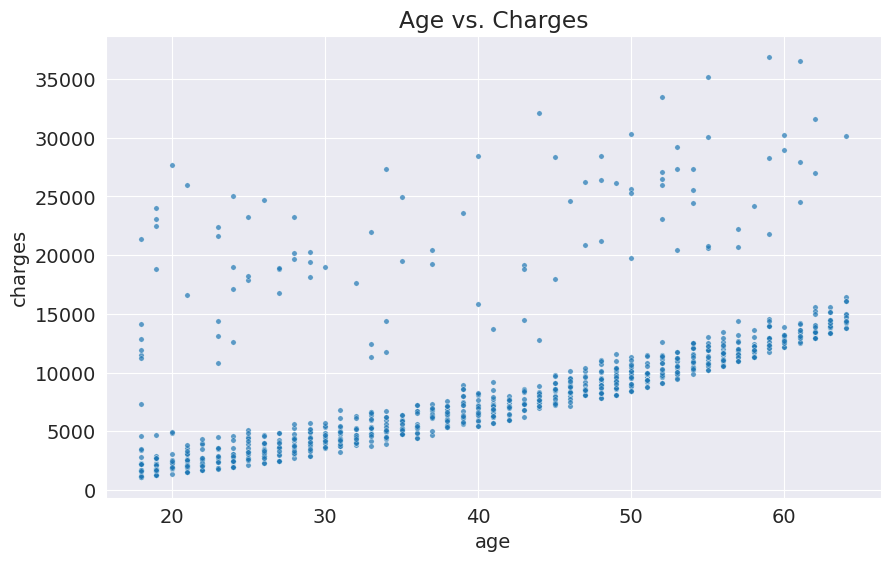

In [27]:
plt.title('Age vs. Charges')
sns.scatterplot(data= non_smoker_df, x='age',y='charges', alpha=0.7, s=15);

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept").

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data.

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line.

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets".

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.

In [28]:
def estimate_charges(age, w, b):
    return w * age + b

The `estimate_charges` function is our very first _model_.

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for charges.

In [29]:
w = 50
b = 100

In [30]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w, b)

We can plot the estimated charges using a line graph.

Text(0, 0.5, ' Estimated charges')

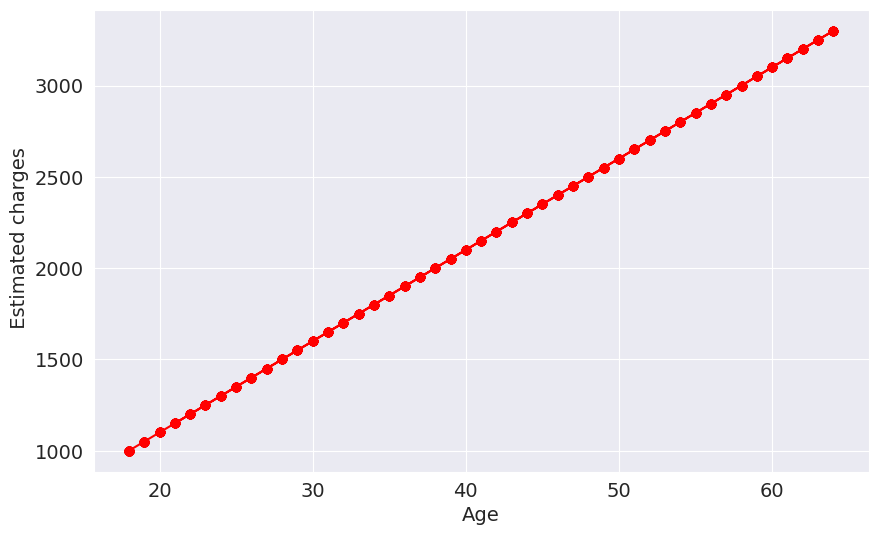

In [31]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age')
plt.ylabel(' Estimated charges')

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our _model_ fits the _data_.

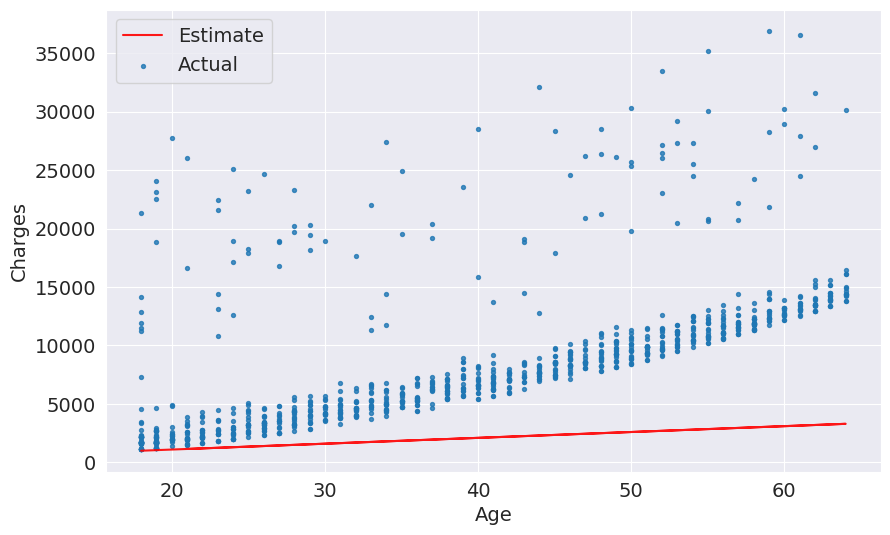

In [32]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [33]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

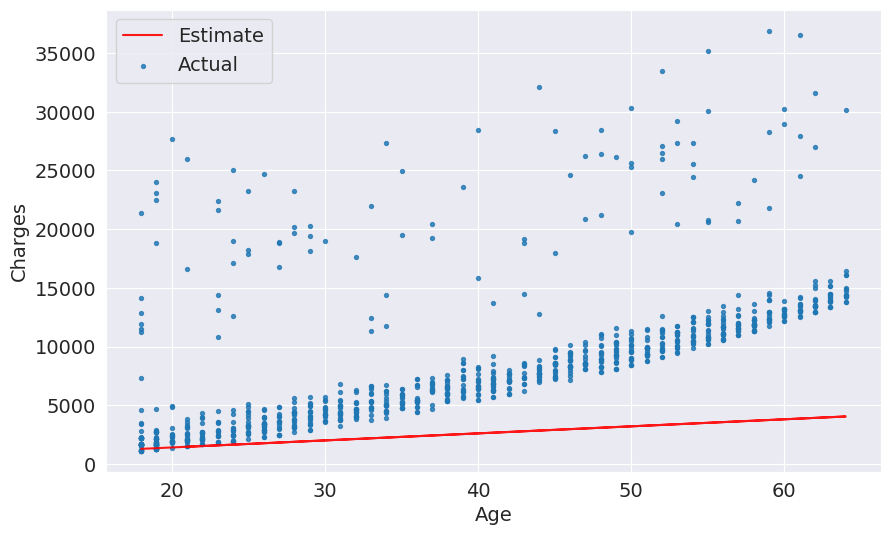

In [34]:
try_parameters(60, 200)

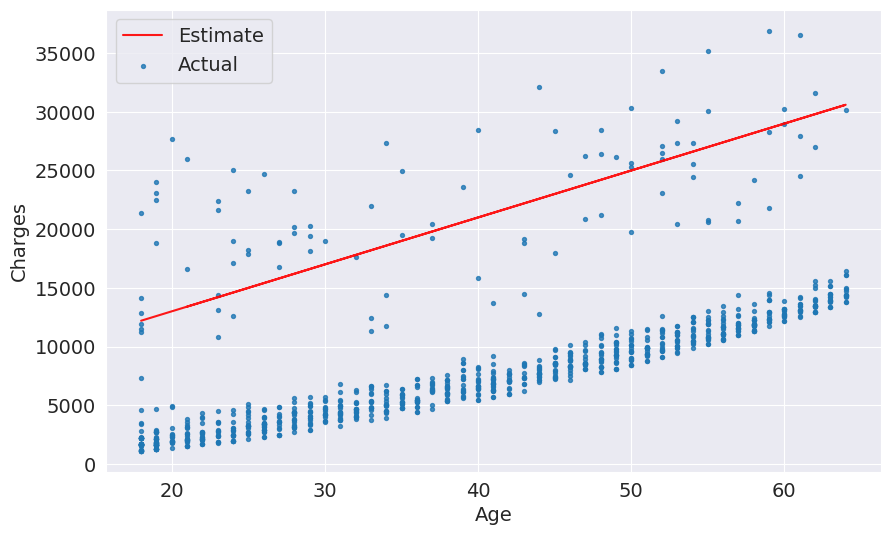

In [35]:
try_parameters(400,5000)

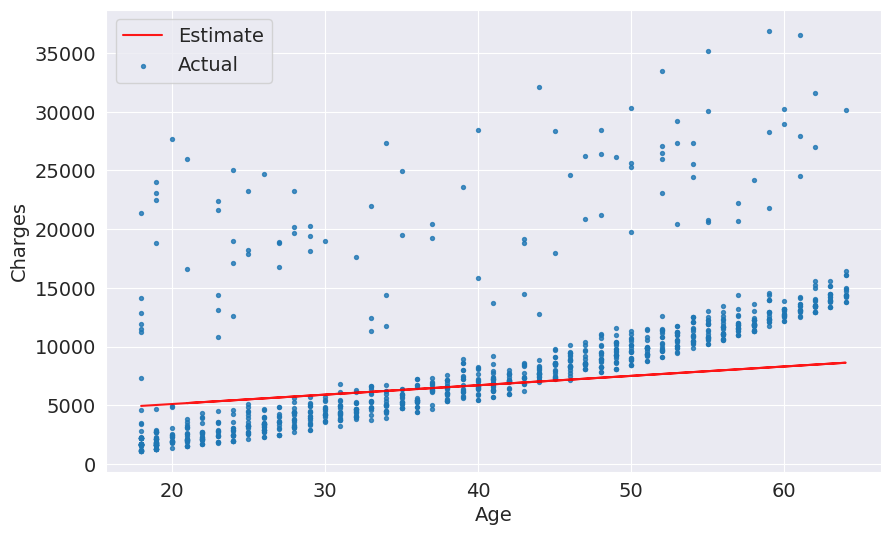

In [36]:
try_parameters(80, 3500)

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.


Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives.

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)




### Linear Regression using Scikit-learn

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

In [39]:
inputs = non_smoker_df[['age']]

In [40]:
targets = non_smoker_df.charges

In [41]:
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


Let's fit the model to the data.

In [42]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [43]:
import numpy as np

In [44]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [45]:
pred = model.predict(inputs)

In [46]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [47]:
rmse(targets, pred)

4662.505766636395

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [48]:
model.coef_

array([267.24891283])

In [49]:
model.intercept_

-2091.4205565650864

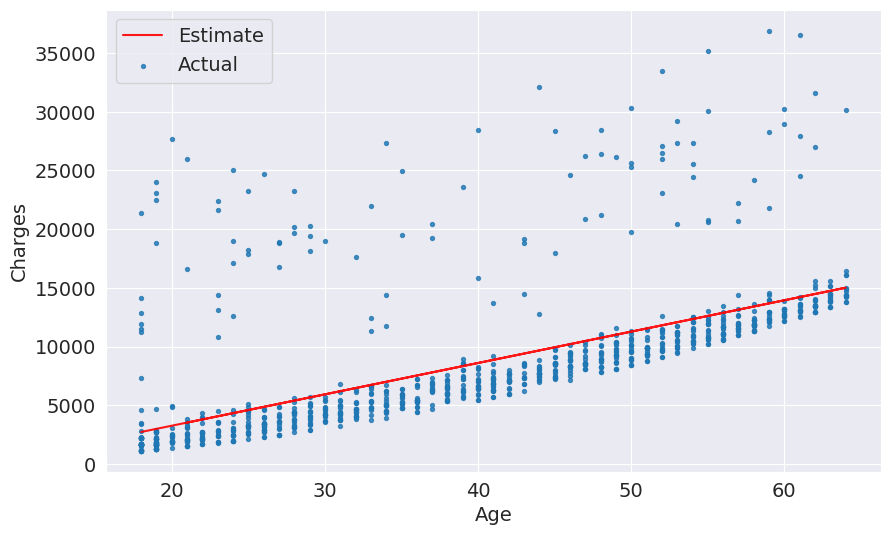

In [50]:
try_parameters(model.coef_, model.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers.


#### SGDRegressor

In [51]:
from sklearn.linear_model import SGDRegressor

In [52]:
sgd_model = SGDRegressor()

In [53]:
sgd_model.fit(inputs, targets)

SGDRegressor()

In [54]:
sgd_pred = model.predict(inputs)

In [55]:
sgd_pred

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [56]:
rmse(targets, sgd_pred)

4662.505766636395

### Machine Learning

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

Here's how the relationship between these three components can be visualized:

<img src="https://i.imgur.com/oiGQFJ9.png" width="480">

## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [57]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [58]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [59]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.

In [60]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [61]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

#### Training a linear regression model to estimate charges using BMI alone.

In [62]:
inputs = non_smoker_df[['bmi']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [63]:
model.fit(inputs, targets)

LinearRegression()

In [64]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 7796.48690809,  8963.39471536, 10963.80809924])

In [65]:
predictions = model.predict(inputs)

In [66]:
predictions

array([8694.17241411, 8629.99248471, 7771.89849358, ..., 8539.97388244,
       8950.89213171, 8029.86846955])

In [67]:
rmse(targets, predictions)

5969.772531913293

In [68]:
# w
model.coef_

array([83.35055766])

In [69]:
# b
model.intercept_

5879.424081872975

In [70]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('BMI');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

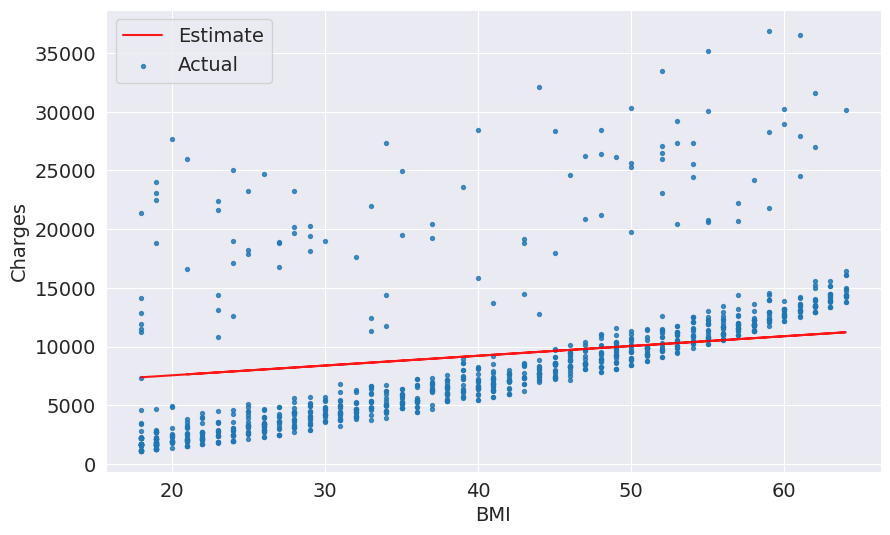

In [71]:
try_parameters(model.coef_, model.intercept_)

its worst then the above model which is the combination of 2 features : BMI and Age

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [72]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [73]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [74]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

In [75]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [76]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['sex', 'smoker', 'region']

# Extract the categorical features
X_categorical = medical_df[categorical_cols]

# Initialize OneHotEncoder without specifying sparse parameter
encoder = OneHotEncoder(drop='first')

# Fit and transform the categorical features
X_encoded = encoder.fit_transform(X_categorical).toarray()

# Create a DataFrame from the encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded features with the original DataFrame
medical_df_encoded = pd.concat([medical_df.drop(columns=categorical_cols), X_encoded_df], axis=1)

# Display the encoded DataFrame
print(medical_df_encoded)

      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400       0.0         1.0   
1      18  33.770         1   1725.55230       1.0         0.0   
2      28  33.000         3   4449.46200       1.0         0.0   
3      33  22.705         0  21984.47061       1.0         0.0   
4      32  28.880         0   3866.85520       1.0         0.0   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830       1.0         0.0   
1334   18  31.920         0   2205.98080       0.0         0.0   
1335   18  36.850         0   1629.83350       0.0         0.0   
1336   21  25.800         0   2007.94500       0.0         0.0   
1337   61  29.070         0  29141.36030       0.0         1.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0.0               1.0  
1                  0.0               1.0               0.0  
2                  0.0  

In [77]:
from sklearn.model_selection import train_test_split

X = medical_df_encoded.drop(columns=['charges'])  # Features
y = medical_df_encoded['charges']  # Target variable

# Perform the train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [78]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46,19.950,2,0.0,0.0,1.0,0.0,0.0
1285,47,24.320,0,0.0,0.0,0.0,0.0,0.0
1142,52,24.860,0,0.0,0.0,0.0,1.0,0.0
969,39,34.320,5,0.0,0.0,0.0,1.0,0.0
486,54,21.470,3,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1095,18,31.350,4,0.0,0.0,0.0,0.0,0.0
1130,39,23.870,5,0.0,0.0,0.0,1.0,0.0
1294,58,25.175,0,1.0,0.0,0.0,0.0,0.0
860,37,47.600,2,0.0,1.0,0.0,0.0,1.0


In [79]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Display the scaled features
print("Scaled X_train:")
print(X_train_scaled)
print("\nScaled X_test:")
print(X_test_scaled)


Scaled X_train:
[[ 0.47222651 -1.75652513  0.73433626 ...  1.78316783 -0.59966106
  -0.5723141 ]
 [ 0.54331294 -1.03308239 -0.91119211 ... -0.56079971 -0.59966106
  -0.5723141 ]
 [ 0.8987451  -0.94368672 -0.91119211 ... -0.56079971  1.66760869
  -0.5723141 ]
 ...
 [ 1.3252637  -0.89153925 -0.91119211 ... -0.56079971 -0.59966106
  -0.5723141 ]
 [-0.16755139  2.82086429  0.73433626 ... -0.56079971 -0.59966106
   1.74729228]
 [ 1.1120044  -0.10932713 -0.91119211 ... -0.56079971 -0.59966106
   1.74729228]]

Scaled X_test:
[[ 0.40114007 -0.89153925  0.73433626 ... -0.56079971 -0.59966106
  -0.5723141 ]
 [-0.23863782 -0.08946143 -0.91119211 ...  1.78316783 -0.59966106
  -0.5723141 ]
 [ 1.75178229 -0.60845296 -0.91119211 ...  1.78316783 -0.59966106
  -0.5723141 ]
 ...
 [-0.09646495 -0.41972876 -0.08842793 ... -0.56079971 -0.59966106
  -0.5723141 ]
 [ 1.04091797  2.78941026 -0.91119211 ... -0.56079971  1.66760869
  -0.5723141 ]
 [ 0.82765867  0.60252728 -0.08842793 ... -0.56079971 -0.59966106


In [81]:
linear_model = LinearRegression()

In [82]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [83]:
predictions = linear_model.predict(X_test)

In [84]:
predictions

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673494, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [85]:
# Compute loss to evalute the model
loss = rmse(y_test, predictions)

In [86]:
print('Loss:', loss)

Loss: 5796.284659276273


In [87]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 33596915.85136145


In [88]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)


R2 Score: 0.7835929767120724
